# Deep Learning
## HW2 - Problem 3

1.   Full Name: Amir Mohammad Yaghoobian zadeh
2.   Student Number: 401300525

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
from google.colab import drive
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#part A

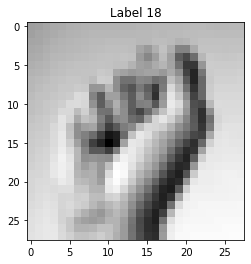

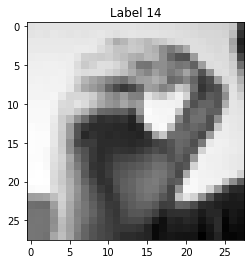

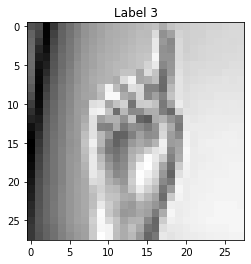

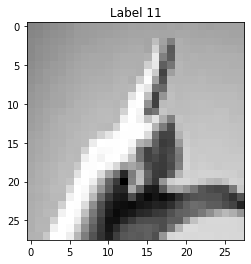

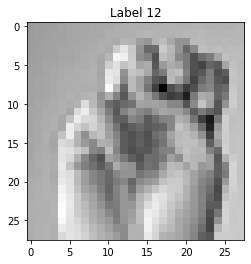

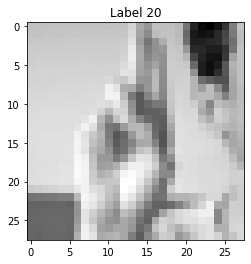

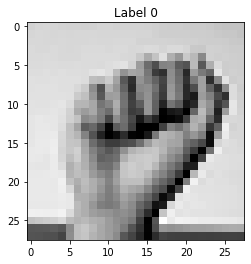

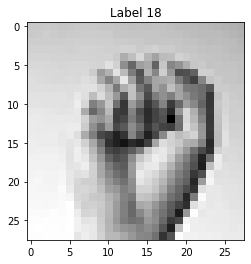

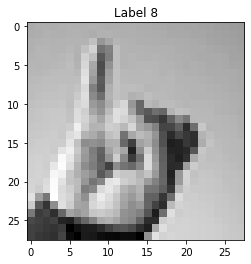

In [74]:
data_train = pd.read_csv('gdrive/MyDrive/Deep learning/HW2/Data/HW2_data/Q3_train.csv').to_numpy()
data_test = pd.read_csv('gdrive/MyDrive/Deep learning/HW2/Data/HW2_data/Q3_test.csv').to_numpy()

for _ in range(9):
  temp = np.random.randint(0,len(data_train))
  plt.imshow(data_train[temp,1:].reshape(28,28), cmap='gray')
  plt.title(f"Label {data_train[temp,0]}")
  plt.show()

#part B

In [75]:
class CustomImageDataset(Dataset):
    def __init__(self, Data, device, transform=None, target_transform=None):
        self.img_labels = Data[:, 0]
        self.img = Data[:, 1:]
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        image = torch.tensor(self.img[idx,:], dtype=torch.float32, device=device)
        label = torch.zeros((25,), device=device)
        label[self.img_labels[idx]] = 1
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


class My_NN(nn.Module):
  def __init__(self):
    super(My_NN, self).__init__()
    self.L1 = nn.Linear(28*28,800)
    self.L2 = nn.Linear(800,800)
    self.L3 = nn.Linear(800,400)
    self.L4 = nn.Linear(400,100)
    self.L5 = nn.Linear(100,25)
    
    self.act = nn.ReLU()
    self.softmax = nn.Softmax()
  
  def forward(self,x):
    x = self.act(self.L1(x))
    x = self.act(self.L2(x))
    x = self.act(self.L3(x))
    x = self.act(self.L4(x))
    out = self.softmax(self.L5(x))

    return out

def train_loop(data_loader, model, loss_func, optimizer):
  size = len(data_loader.dataset)
  num_batch = len(data_loader)

  train_loss, correct = 0, 0

  for batch ,(X,y) in enumerate(data_loader):
    pred = model(X)
    loss = loss_func(pred,y)
    train_loss += loss.item()
    correct += (pred.argmax(1) == y.argmax(1)).type(torch.float).sum().item()

    # Back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


  train_loss /= num_batch
  correct /= size
  print(f"train error:\n Accuracy: {(100*correct):>0.1f}%, Average loss: {train_loss:>8f}")
  return train_loss, 100*correct


def test_loop(data_loader, model, loss_func, val=False):
  size = len(data_loader.dataset)
  num_batch = len(data_loader)

  test_loss, correct = 0, 0

  with torch.no_grad():
    for X, y in data_loader:
        pred = model(X)
        test_loss += loss_func(pred,y).item()
        correct += (pred.argmax(1) == y.argmax(1)).type(torch.float).sum().item()

  test_loss /= num_batch
  correct /= size
  if val==True:
    print(f"val error:\n Accuracy: {(100*correct):>0.1f}%, Average loss: {test_loss:>8f}")
  else:
    print(f"test error:\n Accuracy: {(100*correct):>0.1f}%, Average loss: {test_loss:>8f} \n")
  
  return test_loss, 100*correct



In [76]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(device)

n = int(data_train.shape[0] * 0.1)
data_val = data_train[:n, :]
data_train = data_train[n:, :]

train_set = CustomImageDataset(data_train, device)
val_set = CustomImageDataset(data_val, device)
test_set = CustomImageDataset(data_test, device)

train_dataloader = DataLoader(train_set, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_set, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_set, batch_size=64, shuffle=True)


cuda:0


In [77]:
# SGD
learning_rate = 0.01
epochs = 50

model = My_NN().to(device)
loss_func = nn.CrossEntropyLoss(label_smoothing=0.2)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

train = []
test = []
val = []

for epoch in range(epochs):
  print(f"Epoch: {epoch+1}")
  train.append(train_loop(train_dataloader, model, loss_func, optimizer))
  val.append(test_loop(val_dataloader, model, loss_func, val=True))
  test.append(test_loop(test_dataloader, model, loss_func))

train_SGD = np.asarray(train)
test_SGD = np.asarray(test)


Epoch: 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


train error:
 Accuracy: 18.6%, Average loss: 3.129010
val error:
 Accuracy: 20.4%, Average loss: 3.107662
test error:
 Accuracy: 14.8%, Average loss: 3.147322 

Epoch: 2
train error:
 Accuracy: 33.9%, Average loss: 3.015059
val error:
 Accuracy: 14.5%, Average loss: 3.155792
test error:
 Accuracy: 12.8%, Average loss: 3.167409 

Epoch: 3
train error:
 Accuracy: 43.9%, Average loss: 2.937151
val error:
 Accuracy: 49.9%, Average loss: 2.882624
test error:
 Accuracy: 42.3%, Average loss: 2.944500 

Epoch: 4
train error:
 Accuracy: 50.6%, Average loss: 2.881076
val error:
 Accuracy: 50.1%, Average loss: 2.884935
test error:
 Accuracy: 42.8%, Average loss: 2.940976 

Epoch: 5
train error:
 Accuracy: 54.5%, Average loss: 2.846133
val error:
 Accuracy: 57.0%, Average loss: 2.825675
test error:
 Accuracy: 48.6%, Average loss: 2.898402 

Epoch: 6
train error:
 Accuracy: 56.4%, Average loss: 2.827264
val error:
 Accuracy: 57.5%, Average loss: 2.819826
test error:
 Accuracy: 48.7%, Average loss: 

In [78]:
# Adam
learning_rate = 0.0001
epochs = 50

model = My_NN().to(device)
loss_func = nn.CrossEntropyLoss(label_smoothing=0.2)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train = []
test = []
val = []

for epoch in range(epochs):
  print(f"Epoch: {epoch+1}")
  train.append(train_loop(train_dataloader, model, loss_func, optimizer))
  val.append(test_loop(val_dataloader, model, loss_func, val=True))
  test.append(test_loop(test_dataloader, model, loss_func))


train_adam = np.asarray(train)
test_adam = np.asarray(test)



Epoch: 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


train error:
 Accuracy: 10.0%, Average loss: 3.192934
val error:
 Accuracy: 27.1%, Average loss: 3.072054
test error:
 Accuracy: 26.6%, Average loss: 3.074334 

Epoch: 2
train error:
 Accuracy: 35.7%, Average loss: 2.995305
val error:
 Accuracy: 40.8%, Average loss: 2.951064
test error:
 Accuracy: 36.1%, Average loss: 2.993150 

Epoch: 3
train error:
 Accuracy: 47.5%, Average loss: 2.901986
val error:
 Accuracy: 52.5%, Average loss: 2.859384
test error:
 Accuracy: 43.0%, Average loss: 2.933522 

Epoch: 4
train error:
 Accuracy: 53.2%, Average loss: 2.853081
val error:
 Accuracy: 53.8%, Average loss: 2.850583
test error:
 Accuracy: 41.3%, Average loss: 2.946680 

Epoch: 5
train error:
 Accuracy: 56.5%, Average loss: 2.829051
val error:
 Accuracy: 57.5%, Average loss: 2.821409
test error:
 Accuracy: 47.1%, Average loss: 2.904528 

Epoch: 6
train error:
 Accuracy: 61.3%, Average loss: 2.790478
val error:
 Accuracy: 63.6%, Average loss: 2.774541
test error:
 Accuracy: 51.7%, Average loss: 

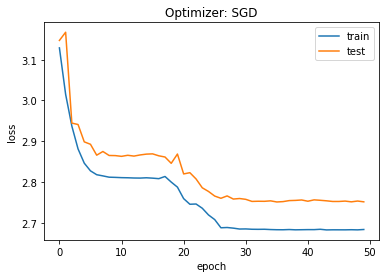

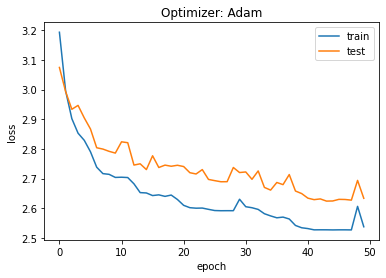

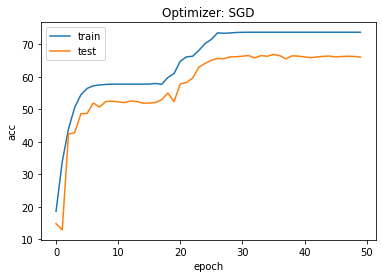

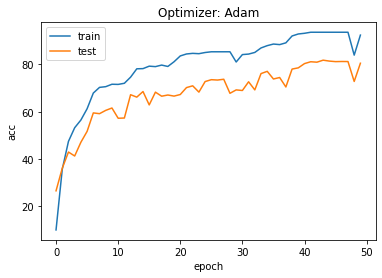

In [79]:
plt.plot(train_SGD[:,0])
plt.plot(test_SGD[:,0])
plt.legend(['train','test'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Optimizer: SGD')
plt.show()

plt.plot(train_adam[:,0])
plt.plot(test_adam[:,0])
plt.legend(['train','test'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Optimizer: Adam')
plt.show()

plt.plot(train_SGD[:,1])
plt.plot(test_SGD[:,1])
plt.legend(['train','test'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('Optimizer: SGD')
plt.show()

plt.plot(train_adam[:,1])
plt.plot(test_adam[:,1])
plt.legend(['train','test'])
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('Optimizer: Adam')
plt.show()

In [81]:
print(test_SGD[:,1].max())
print(test_adam[:,1].max())


66.92693809258226
81.81818181818183


SGD accuracy: 66.9

Adam accuracy: 81.8

The accuracy is more better in Adam compared to SGD algorithm.
Stochastic gradient descent maintains a single learning rate for all weight updates and the learning rate does not change during training. Adam combines the advantages of two other extensions of stochastic gradient descent (AdaGrad and RMSProp)

Adaptive Gradient Algorithm (AdaGrad) that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).
Root Mean Square Propagation (RMSProp) that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on online and non-stationary problems (e.g. noisy).
Instead of adapting the parameter learning rates based on the average first moment (the mean) as in RMSProp, Adam also makes use of the average of the second moments of the gradients (the uncentered variance).
Specifically, the algorithm calculates an exponential moving average of the gradient and the squared gradient, and the parameters beta1 and beta2 control the decay rates of these moving averages.

references:

1) https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/#:~:text=Adam%20is%20a%20replacement%20optimization,sparse%20gradients%20on%20noisy%20problems.



#part C

In [82]:
# Drop out

class My_NN(nn.Module):
  def __init__(self):
    super(My_NN, self).__init__()
    self.net = nn.Sequential(
        nn.Linear(28*28,800),
        nn.ReLU(),
        # nn.Dropout(p=0.2),
        nn.Linear(800,800),
        nn.ReLU(),
        # nn.Dropout(p=0.2),
        nn.Linear(800,400),
        nn.ReLU(),
        # nn.Dropout(p=0.2),
        nn.Linear(400,100),
        nn.ReLU(),
        nn.Dropout(p=0.6),
        nn.Linear(100,25),
        nn.Softmax()
    )


  def forward(self,x):
    out = self.net(x)

    return out

# Adam
learning_rate = 0.0001
epochs = 100

model = My_NN().to(device)
loss_func = nn.CrossEntropyLoss(label_smoothing=0.2)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train = []
test = []
val = []

best_acc = 0

for epoch in range(epochs):
  print(f"Epoch: {epoch+1}")
  train.append(train_loop(train_dataloader, model, loss_func, optimizer))
  val.append(test_loop(val_dataloader, model, loss_func, val=True))
  test.append(test_loop(test_dataloader, model, loss_func))

  if test[-1][1]>best_acc:
    best_model = model

train_adam = np.asarray(train)
test_adam = np.asarray(test)


Epoch: 1


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


train error:
 Accuracy: 5.6%, Average loss: 3.224811
val error:
 Accuracy: 11.3%, Average loss: 3.177304
test error:
 Accuracy: 8.7%, Average loss: 3.197179 

Epoch: 2
train error:
 Accuracy: 16.1%, Average loss: 3.145102
val error:
 Accuracy: 22.7%, Average loss: 3.092256
test error:
 Accuracy: 19.5%, Average loss: 3.115748 

Epoch: 3
train error:
 Accuracy: 25.0%, Average loss: 3.077893
val error:
 Accuracy: 31.1%, Average loss: 3.032515
test error:
 Accuracy: 24.2%, Average loss: 3.084507 

Epoch: 4
train error:
 Accuracy: 32.4%, Average loss: 3.020013
val error:
 Accuracy: 33.9%, Average loss: 3.007770
test error:
 Accuracy: 27.4%, Average loss: 3.056828 

Epoch: 5
train error:
 Accuracy: 39.1%, Average loss: 2.968539
val error:
 Accuracy: 40.9%, Average loss: 2.952333
test error:
 Accuracy: 30.3%, Average loss: 3.031505 

Epoch: 6
train error:
 Accuracy: 44.2%, Average loss: 2.927417
val error:
 Accuracy: 47.8%, Average loss: 2.900689
test error:
 Accuracy: 35.8%, Average loss: 2.

In [83]:
print(test_adam[:,1].max())


86.76798661461238


#test accuracy: 86.7

dropout made the test accuracy better. but if I increase the dropout rate the learning is impossible and dont converges to a solution.

#part D

# best model architecture:
    #     nn.Sequential(
    #     nn.Linear(28*28,800),
    #     nn.ReLU(),
    #     nn.Linear(800,800),
    #     nn.ReLU(),
    #     nn.Linear(800,400),
    #     nn.ReLU(),
    #     nn.Linear(400,100),
    #     nn.ReLU(),
    #     nn.Dropout(p=0.6),
    #     nn.Linear(100,25),
    #     nn.Softmax()
    # )

# test accuracy: 85.7 %


#part H

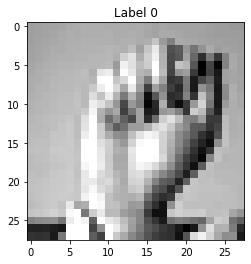

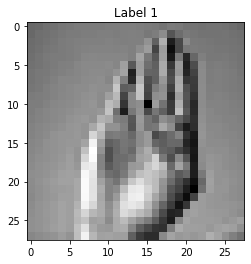

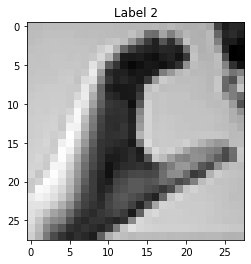

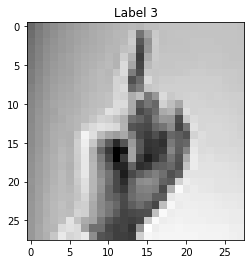

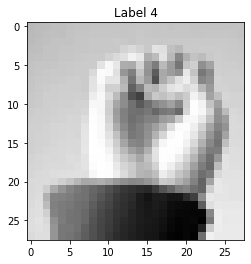

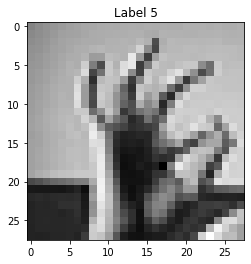

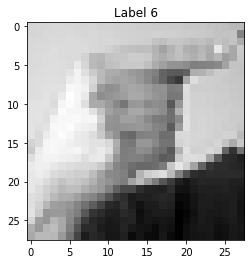

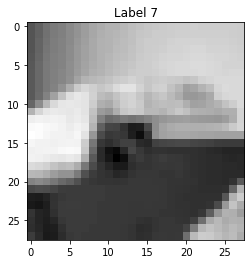

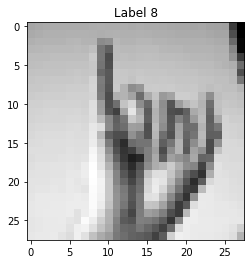

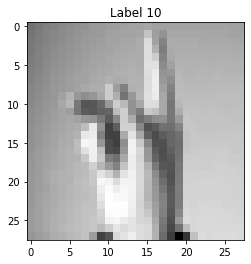

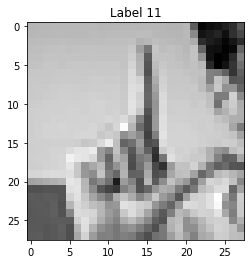

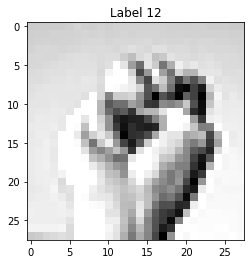

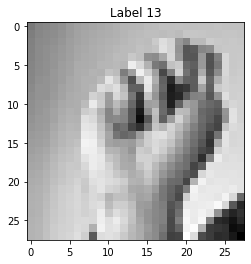

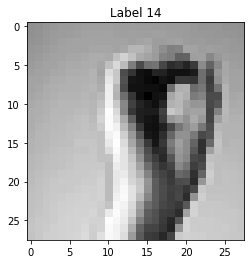

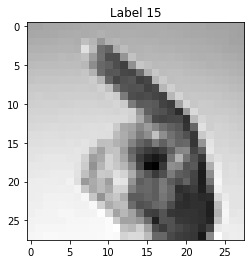

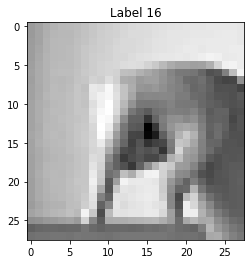

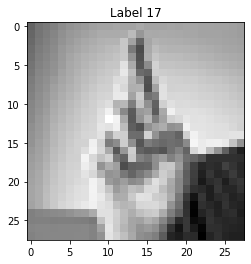

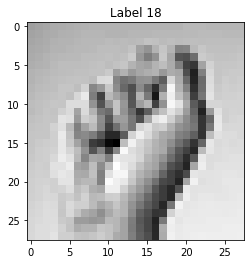

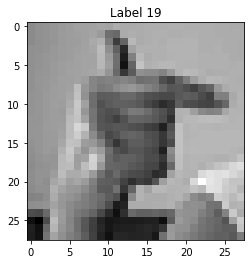

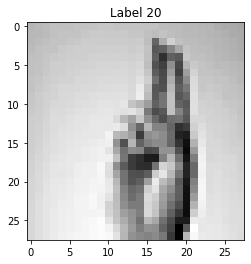

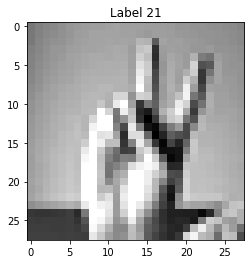

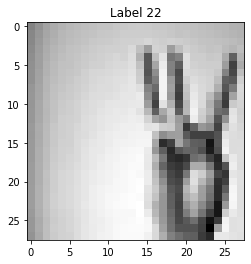

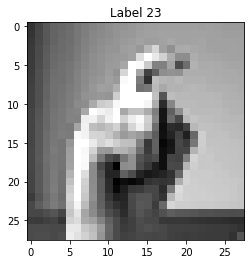

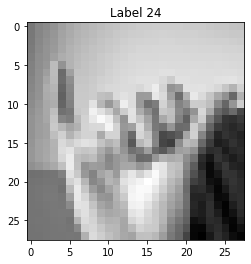

In [84]:
for i in range(25):
  temp = np.where(data_train[:,0]==i)[0]
  if temp.shape[0] > 0:
    temp = temp[0]
    plt.imshow(data_train[temp,1:].reshape(28,28), cmap='gray')
    plt.title(f"Label {data_train[temp,0]}")
    plt.show()


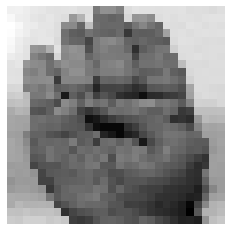

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.8026e-45, 7.2592e-35,
         0.0000e+00, 1.3455e-37, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         4.6454e-18, 6.1379e-39, 4.5475e-33, 8.6114e-24, 1.0000e+00, 0.0000e+00,
         7.7451e-40, 1.2076e-25, 1.4013e-45, 1.2533e-30, 4.6988e-41, 5.4406e-33,
         4.3465e-38]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
16


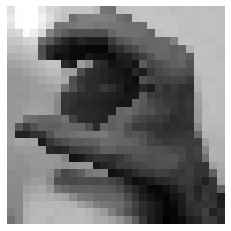

tensor([[7.3678e-30, 6.6888e-38, 2.8026e-44, 2.2855e-28, 4.7621e-26, 8.8302e-33,
         3.3508e-14, 1.3086e-35, 1.9618e-44, 1.4013e-45, 2.6328e-23, 4.3805e-35,
         8.7418e-16, 1.0946e-16, 6.5557e-24, 3.4951e-03, 9.9650e-01, 9.5161e-36,
         2.1967e-26, 4.2958e-24, 6.6719e-18, 5.7983e-17, 1.2777e-18, 2.5268e-17,
         5.9477e-23]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
15


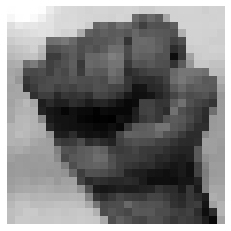

tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.2892e-43,
         0.0000e+00, 4.7405e-41, 6.3058e-44, 0.0000e+00, 1.4188e-41, 5.0741e-42,
         0.0000e+00, 2.4599e-32, 1.4013e-45, 1.4013e-45, 1.1630e-10, 0.0000e+00,
         1.8709e-40, 0.0000e+00, 0.0000e+00, 2.2976e-33, 0.0000e+00, 1.2483e-34,
         5.7090e-19]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
0


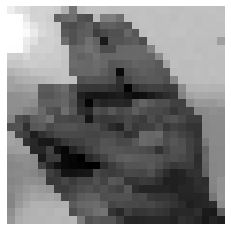

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         1.3322e-31, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.4466e-41, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 1.1888e-33, 9.9995e-01, 5.0075e-05, 6.9418e-32,
         0.0000e+00, 1.9455e-14, 5.9039e-40, 0.0000e+00, 0.0000e+00, 1.5994e-41,
         0.0000e+00]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
15


In [85]:
import cv2

img = cv2.resize(cv2.imread('gdrive/MyDrive/Deep learning/HW2/label1.jpg',0), dsize=(28, 28))

plt.imshow(img,'gray')
plt.axis("off")
plt.show()
img = torch.tensor(img, dtype=torch.float32).to(device).reshape(1,-1)

print(best_model(img))
print(best_model(img).argmax().item())

img = cv2.resize(cv2.imread('gdrive/MyDrive/Deep learning/HW2/label2.jpg',0), dsize=(28, 28))

plt.imshow(img,'gray')
plt.axis("off")
plt.show()
img = torch.tensor(img, dtype=torch.float32).to(device).reshape(1,-1)

print(best_model(img))
print(best_model(img).argmax().item())

img = cv2.resize(cv2.imread('gdrive/MyDrive/Deep learning/HW2/label12.jpg',0), dsize=(28, 28))

plt.imshow(img,'gray')
plt.axis("off")
plt.show()
img = torch.tensor(img, dtype=torch.float32).to(device).reshape(1,-1)

print(best_model(img))
print(best_model(img).argmax().item())

img = cv2.resize(cv2.imread('gdrive/MyDrive/Deep learning/HW2/label20.jpg',0), dsize=(28, 28))

plt.imshow(img,'gray')
plt.axis("off")
plt.show()
img = torch.tensor(img, dtype=torch.float32).to(device).reshape(1,-1)

print(best_model(img))
print(best_model(img).argmax().item())
